## Task 1.1 (Supervised Learning) - Predicting Adoption

1. **Predicting  Adoption (binary classification task)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas_profiling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import itertools
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob
from sklearn.ensemble import AdaBoostClassifier , VotingClassifier
from sklearn import preprocessing
from sklearn import tree
import warnings
import pydot
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
from collections import Counter
import random
from IPython.display import HTML, display
%matplotlib inline
warnings.filterwarnings('ignore')

## Read the preprocessed dataset

In [2]:
PetFinder_dataset = pd.read_csv("PetFinder_dataset_pp.csv")

In [3]:
PetFinder_dataset

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,...,DescWords,AgeBin,FeeBin,PhotoAmtBin,PolarityBin,SubjectivityBin,DescwordsBin,Adopted,AdoptionSpeed,InitialAdoptionSpeed
0,Cat,3,Male,Small,Short,No,No,No,Healthy,1,...,69,"(-0.1, 3.0]","(0.0, 300.0]","(0.99, 3.99]","(0.1, 0.15]","(0.379, 0.442]","(56.0, 71.0]",True,instant adoption,2
1,Cat,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,...,23,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.0333, 0.1]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,0
2,Dog,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,...,69,"(-0.1, 3.0]","(-0.1, 0.0]","(3.99, 30.0]","(0.239, 0.288]","(0.521, 0.562]","(56.0, 71.0]",True,delayed adoption,3
3,Dog,4,Female,Medium,Short,Yes,Yes,No,Healthy,1,...,25,"(3.0, 12.0]","(0.0, 300.0]","(3.99, 30.0]","(0.288, 0.35]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,2
4,Dog,1,Male,Medium,Short,No,No,No,Healthy,1,...,81,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.35, 0.434]","(0.734, 1.0]","(71.0, 93.0]",True,instant adoption,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,Cat,1,Female,Medium,Short,No,Yes,No,Healthy,1,...,81,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.15, 0.193]","(0.2, 0.379]","(71.0, 93.0]",True,delayed adoption,3
12983,Dog,6,Female,Small,Long,Yes,Yes,No,Healthy,1,...,1,"(3.0, 12.0]","(-0.1, 0.0]","(0.99, 3.99]","(-1.001, 0.0]","(-0.001, 0.2]","(-0.001, 9.0]",True,instant adoption,0
12984,Cat,60,Mixed,Medium,Medium,Yes,Yes,Yes,Healthy,2,...,31,"(12.0, 255.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.15, 0.193]","(0.2, 0.379]","(25.0, 34.0]",False,very late adoption,4
12985,Cat,9,Female,Small,Short,Yes,Yes,Yes,Healthy,1,...,18,"(3.0, 12.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.434, 1.0]","(0.6, 0.65]","(17.0, 25.0]",False,very late adoption,4


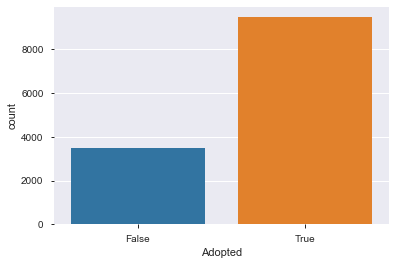

In [4]:
sns.countplot(x=PetFinder_dataset['Adopted'])
plt.show()

## Perform undersampling of the majority class

In [5]:
PetFinder_dataset = pd.concat([PetFinder_dataset[~PetFinder_dataset['Adopted']], 
    PetFinder_dataset[PetFinder_dataset['Adopted']].sample(n=PetFinder_dataset[~PetFinder_dataset['Adopted']]['Adopted'].count(), replace=False, random_state=None)])


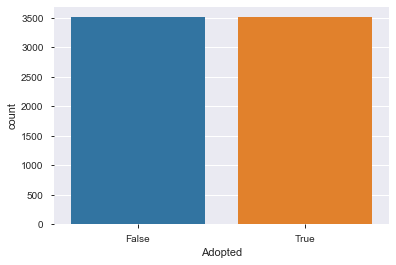

In [6]:
sns.countplot(x=PetFinder_dataset['Adopted'])
plt.show()

In [7]:
BinaryClassification = PetFinder_dataset.drop(['AdoptionSpeed','InitialAdoptionSpeed','AgeBin','FeeBin','PhotoAmtBin','PolarityBin','DescwordsBin','SubjectivityBin'],axis=1).copy(deep=True)

In [8]:
BinaryClassification.head(3)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,Adopted
8,Cat,12,Female,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Selangor,2.0,1,Domestic,BlackOther,0.213750,0.511250,45,False
13,Dog,78,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Selangor,2.0,1,Mixed Breed,BlackOther,0.502083,0.645833,68,False
15,Dog,8,Female,Medium,Short,No,Yes,Yes,Healthy,1,10,Perak,2.0,1,Mixed Breed,Brown,0.213333,0.460000,71,False


In [9]:
BinaryClassification.isnull().sum()

Type            0
Age             0
Gender          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Quantity        0
Fee             0
State           0
PhotoAmt        0
Hasname         0
Breed           0
Color           0
Polarity        0
Subjectivity    0
DescWords       0
Adopted         0
dtype: int64

In [10]:
BinaryClassification.dtypes

Type             object
Age               int64
Gender           object
MaturitySize     object
FurLength        object
Vaccinated       object
Dewormed         object
Sterilized       object
Health           object
Quantity          int64
Fee               int64
State            object
PhotoAmt        float64
Hasname           int64
Breed            object
Color            object
Polarity        float64
Subjectivity    float64
DescWords         int64
Adopted            bool
dtype: object

In [11]:
BinaryClassification.shape

(7016, 20)

In [12]:
mm_scaler = preprocessing.MinMaxScaler()
BinaryClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']] = mm_scaler.fit_transform(BinaryClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']])

In [13]:
y = BinaryClassification['Adopted']

In [14]:
BinaryClassification.drop([ 'Adopted'], axis=1 , inplace=True)

## Encoding the categorical variables

In [15]:
one_hot = pd.get_dummies(BinaryClassification)

In [16]:
one_hot

,Age,Quantity,Fee,PhotoAmt,Hasname,Polarity,Subjectivity,DescWords,Type_Cat,Type_Dog,...,Color_BrownOther,Color_Cream,Color_CreamOther,Color_Golden,Color_GoldenOther,Color_Gray,Color_GrayOther,Color_White,Color_Yellow,Color_YellowOther
8,0.047059,0.0,0.0000,0.066667,1,0.213750,0.511250,0.035800,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0.305882,0.0,0.0000,0.066667,1,0.502083,0.645833,0.054097,0,1,...,0,0,0,0,0,0,0,0,0,0
15,0.031373,0.0,0.0050,0.066667,1,0.213333,0.460000,0.056484,0,1,...,0,0,0,0,0,0,0,0,0,0
18,0.039216,0.0,0.0000,0.000000,1,0.191667,0.266667,0.051710,0,1,...,0,0,0,0,0,0,0,0,0,0
28,0.011765,0.0,0.0005,0.166667,1,0.000000,0.500000,0.002387,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0.007843,0.0,0.0000,0.100000,1,0.524074,0.711111,0.042164,0,1,...,0,0,0,0,0,0,0,0,0,0
3263,0.007843,0.0,0.0000,0.033333,0,0.000000,0.000000,0.001591,0,1,...,0,0,0,0,0,0,0,1,0,0
1757,0.007843,1.0,0.0000,0.166667,1,0.098718,0.483333,0.066030,1,0,...,0,0,0,0,0,0,0,0,0,0
1514,0.047059,0.0,0.0000,0.066667,1,0.300000,0.587500,0.009547,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(one_hot, y, test_size=0.20, shuffle = True)

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1.2. Learning Classifiers

### Decision Tree Classifier

In [19]:
# Set the parameters by cross-validation
tuned_parameters = [{'criterion':['gini','entropy'],'max_leaf_nodes': [20,40,80]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_DTC = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    clf_DTC.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(clf_DTC.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = clf_DTC.cv_results_['mean_test_score']
    stds = clf_DTC.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_DTC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = clf_DTC.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'criterion': 'entropy', 'max_leaf_nodes': 20}

Grid scores on Train set:

0.663 (+/-0.025) for {'criterion': 'gini', 'max_leaf_nodes': 20}
0.662 (+/-0.029) for {'criterion': 'gini', 'max_leaf_nodes': 40}
0.660 (+/-0.030) for {'criterion': 'gini', 'max_leaf_nodes': 80}
0.664 (+/-0.017) for {'criterion': 'entropy', 'max_leaf_nodes': 20}
0.663 (+/-0.023) for {'criterion': 'entropy', 'max_leaf_nodes': 40}
0.659 (+/-0.020) for {'criterion': 'entropy', 'max_leaf_nodes': 80}

Detailed classification report on Test Set:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       700
           1       0.69      0.64      0.66       704

    accuracy                           0.67      1404
   macro avg       0.67      0.67      0.67      1404
weighted avg       0.67      0.67      0.67      1404




### Dsiplay the Decision Tree based on the best parameters found

In [20]:
clf_DTC = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=80)
clf_DTC.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_DTC, out_file="clf_DTC.dot",
                                feature_names=one_hot.columns,
                                class_names=['0' , '1'],
                                filled=True, rounded=True,
                                special_characters=True)

In [21]:
(clf_DTC_graph,) = pydot.graph_from_dot_file('clf_DTC.dot')
clf_DTC_graph.write_png('clf_DTC.png')

In [22]:
display(HTML('<img src="clf_DTC.png?%d" alt="clf_DTC.png" height="100">' % random.randint(0,2e9)))

In [23]:
scores = cross_val_score(clf_DTC, X_train, y_train, cv=5)

In [24]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.02)


In [25]:
pred = clf_DTC.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=['0' , '1']))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       700
           1       0.63      0.74      0.68       704

    accuracy                           0.66      1404
   macro avg       0.66      0.66      0.65      1404
weighted avg       0.66      0.66      0.65      1404



Confusion matrix, without normalization


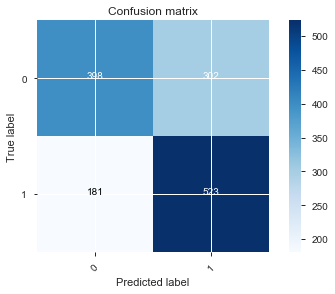

In [26]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Linear SVM

In [27]:
# Set the parameters by cross-validation
tuned_parameters = [{'loss':['hinge','squared_hinge'],'alpha': 10.0**-np.arange(1,7),'penalty':['l2','l1']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    sgd_clf = GridSearchCV(
        SGDClassifier(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    sgd_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(sgd_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = sgd_clf.cv_results_['mean_test_score']
    stds = sgd_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, sgd_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = sgd_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

Grid scores on Train set:

0.612 (+/-0.036) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l2'}
0.562 (+/-0.102) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
0.542 (+/-0.054) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.574 (+/-0.041) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.612 (+/-0.036) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.612 (+/-0.036) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.537 (+/-0.027) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.581 (+/-0.015) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.622 (+/-0.042) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
0.620 (+/-0.040) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.546 (+/-0.036) for {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.534 (+/-0.091) for

Confusion matrix, without normalization


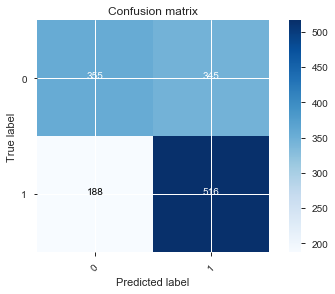

In [28]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Logistic Regression

In [29]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': 10.0**np.arange(0,7),'penalty':['l2','l1'],'solver':['liblinear','lbfgs']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    lr_clf = GridSearchCV(
        LogisticRegression(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    lr_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(lr_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = lr_clf.cv_results_['mean_test_score']
    stds = lr_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = lr_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}

Grid scores on Train set:

0.637 (+/-0.036) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.638 (+/-0.037) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.639 (+/-0.039) for {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.641 (+/-0.037) for {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.640 (+/-0.037) for {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.640 (+/-0.038) for {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.640 (+/-0.038) for {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.640 (+/-0.038) for {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.640 (+/-0.038) for {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 100.0, 'penalty': 'l1', 'solver': 'lbfgs'}

Confusion matrix, without normalization


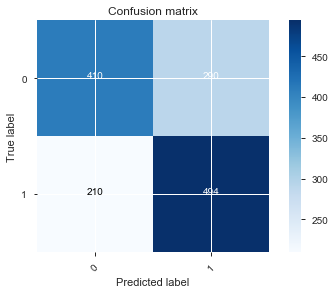

In [30]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Random Forest Classifier

In [31]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [400,500]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    rf_clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    rf_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(rf_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = rf_clf.cv_results_['mean_test_score']
    stds = rf_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = rf_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_estimators': 500}

Grid scores on Train set:

0.698 (+/-0.033) for {'n_estimators': 400}
0.700 (+/-0.035) for {'n_estimators': 500}

Detailed classification report on Test Set:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       700
           1       0.71      0.70      0.70       704

    accuracy                           0.70      1404
   macro avg       0.70      0.70      0.70      1404
weighted avg       0.70      0.70      0.70      1404




Confusion matrix, without normalization


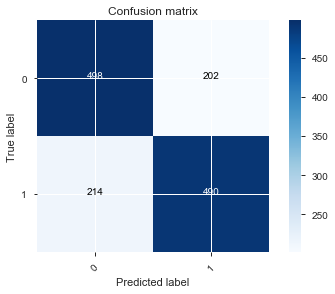

In [32]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### KNN Classifier

In [33]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [5,10,20],'weights':['uniform','distance']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn_clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    knn_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(knn_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = knn_clf.cv_results_['mean_test_score']
    stds = knn_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = knn_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_neighbors': 20, 'weights': 'uniform'}

Grid scores on Train set:

0.598 (+/-0.018) for {'n_neighbors': 5, 'weights': 'uniform'}
0.602 (+/-0.010) for {'n_neighbors': 5, 'weights': 'distance'}
0.606 (+/-0.014) for {'n_neighbors': 10, 'weights': 'uniform'}
0.605 (+/-0.014) for {'n_neighbors': 10, 'weights': 'distance'}
0.620 (+/-0.016) for {'n_neighbors': 20, 'weights': 'uniform'}
0.615 (+/-0.016) for {'n_neighbors': 20, 'weights': 'distance'}

Detailed classification report on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       700
           1       0.62      0.63      0.62       704

    accuracy                           0.62      1404
   macro avg       0.62      0.62      0.62      1404
weighted avg       0.62      0.62      0.62      1404




Confusion matrix, without normalization


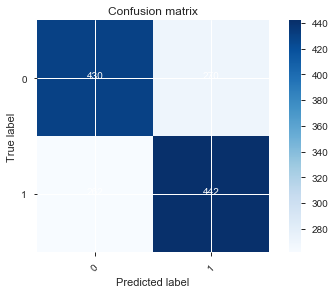

In [34]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Adaboost Classifier

In [35]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [36]:
ada_clf.fit(X_train, y_train)
scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.04)


In [37]:
pred = ada_clf.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=['0' , '1']))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       700
           1       0.66      0.69      0.68       704

    accuracy                           0.67      1404
   macro avg       0.67      0.67      0.67      1404
weighted avg       0.67      0.67      0.67      1404



Confusion matrix, without normalization


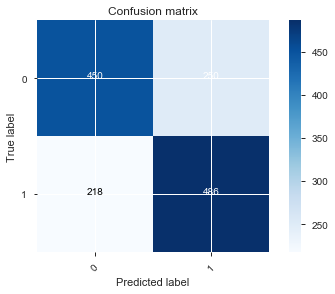

In [38]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Naive Bayes Classifier

In [39]:
# Set the parameters by cross-validation
tuned_parameters = [{'var_smoothing': 10.0**-np.arange(-1,3)}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    NB_clf = GridSearchCV(
        GaussianNB(), tuned_parameters, cv=5, scoring='%s' % score)
    NB_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(NB_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = NB_clf.cv_results_['mean_test_score']
    stds = NB_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, NB_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = NB_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=['0' , '1']))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'var_smoothing': 0.1}

Grid scores on Train set:

0.610 (+/-0.036) for {'var_smoothing': 10.0}
0.609 (+/-0.035) for {'var_smoothing': 1.0}
0.612 (+/-0.030) for {'var_smoothing': 0.1}
0.594 (+/-0.041) for {'var_smoothing': 0.01}

Detailed classification report on Test Set:
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       700
           1       0.59      0.71      0.64       704

    accuracy                           0.60      1404
   macro avg       0.61      0.60      0.60      1404
weighted avg       0.61      0.60      0.60      1404




Confusion matrix, without normalization


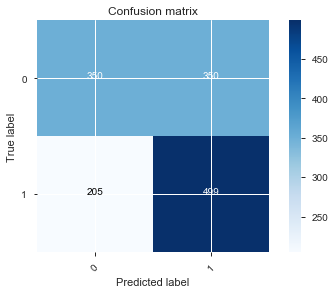

In [40]:
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

## Voting Classifier

In [41]:
eclf = VotingClassifier(estimators=[('onehot-clf1', clf_DTC), ('onehot-clf3', lr_clf) , ('onehot-clf4', rf_clf) , ('onehot-clf5', knn_clf) ,('onehot-clf6', ada_clf)], voting='soft')
eclf.fit(X_train, y_train)
for clf, label in zip([clf_DTC, lr_clf, rf_clf, knn_clf, ada_clf, eclf], ['DecisionTree', 'Logistic Regression', 'Random Forest', 'Knn', 'Adaboost','Voting']):
    scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.66 (+/- 0.02) [DecisionTree]
Accuracy: 0.63 (+/- 0.03) [Logistic Regression]
Accuracy: 0.66 (+/- 0.03) [Random Forest]
Accuracy: 0.58 (+/- 0.01) [Knn]
Accuracy: 0.65 (+/- 0.02) [Adaboost]
Accuracy: 0.65 (+/- 0.02) [Voting]


Confusion matrix, without normalization


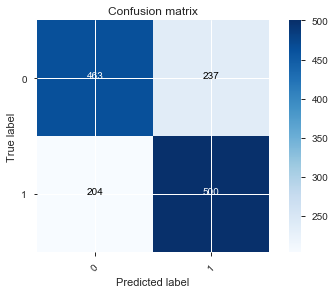

In [42]:
pred=eclf.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

## 1.3. Classification - Results and Discussion 

In this task we have solved the problem of binary classification and our best accuracy from Random Forest and Adaboost. This accuracy score is calculated via voting classifier which checks not only the accuracy but other evaluation measures of different classifiers and then vote for the best one.
In the voting classifier the Linear SVM classifier was not used, since it does not provide probability classification and thus can't be used in soft voting.
We have performed detailed Analysis of features and applied the best practices on them to make most out of them. We have used cross validation to get the best accuracy scores against every classifier we have used.We have also checked the results against different hyper-parameters for classifiers and have reported their best values here.